<a href="https://colab.research.google.com/github/rumeysacelik/NLPProject/blob/main/MobileNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_root='';

data_root='/content/drive/My Drive/nlp/ZIMAGES';
print(data_root)

/content/drive/My Drive/nlp/ZIMAGES


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [ ]:
import pandas as pd

# Increase precision of presented data for better side-by-side comparison
pd.set_option("display.precision", 8)

In [ ]:
print("Version: ", tf.__version__)
print("Hub version: ", hub.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Version:  2.15.0
Hub version:  0.16.1
Eager mode:  True
GPU is NOT AVAILABLE


In [ ]:
# Create data generator for training and validation

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);
datagen_kwargs = dict(rescale=1./255, validation_split=.2)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE)

/content/drive/My Drive/nlp/ZIMAGES
Found 29 images belonging to 12 classes.
Found 144 images belonging to 12 classes.


In [ ]:
# Learn more about data batches

image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 12)


In [ ]:
# Learn about dataset labels

dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['ÇOk Hızlı Git' 'ÇOk Yavaş Git' 'Devam Et' 'Dur' 'Geri Git'
 'Hızlı Git' 'İLeri Git' 'Modeller' 'SağA DöN' 'Sola DöN' 'Yavaş Git'
 'Saved_Models']


In [ ]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
                 output_shape=[1280],
                 trainable=False),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 12)                15372     
                                                                 
Total params: 2273356 (8.67 MB)
Trainable params: 15372 (60.05 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


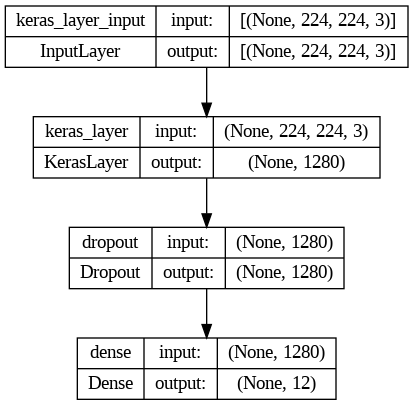

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [ ]:

%cd /content/drive/My Drive/nlp/ZIMAGES

/content/drive/My Drive/nlp/ZIMAGES


In [ ]:
!pwd

/content/drive/My Drive/nlp/ZIMAGES


In [ ]:
# Run model training

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator,
    epochs=50,
    verbose=1,
    steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=val_steps_per_epoch).history

Epoch 1/50
5/5 [==============================] - 47s 8s/step - loss: 3.0135 - acc: 0.1042 - val_loss: 2.3026 - val_acc: 0.1379
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 2.6053 - acc: 0.1597 - val_loss: 2.1991 - val_acc: 0.2414
Epoch 3/50
5/5 [==============================] - 8s 2s/step - loss: 2.3879 - acc: 0.2222 - val_loss: 2.0461 - val_acc: 0.2414
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 2.3206 - acc: 0.1458 - val_loss: 1.9358 - val_acc: 0.2414
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 2.1079 - acc: 0.2639 - val_loss: 1.8712 - val_acc: 0.3448
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 2.0466 - acc: 0.2292 - val_loss: 1.7855 - val_acc: 0.3793
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 1.8336 - acc: 0.3750 - val_loss: 1.7176 - val_acc: 0.3103
Epoch 8/50
5/5 [==============================] - 10s 2s/step - loss: 1.8584 - acc: 0.2986 - val_loss: 1.6629 

In [ ]:
# Measure accuracy and loss after training

final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)

1/1 [==============================] - 1s 1s/step - loss: 1.0430 - acc: 0.6897


In [ ]:
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))

Final loss: 1.04
Final accuracy: 68.97%


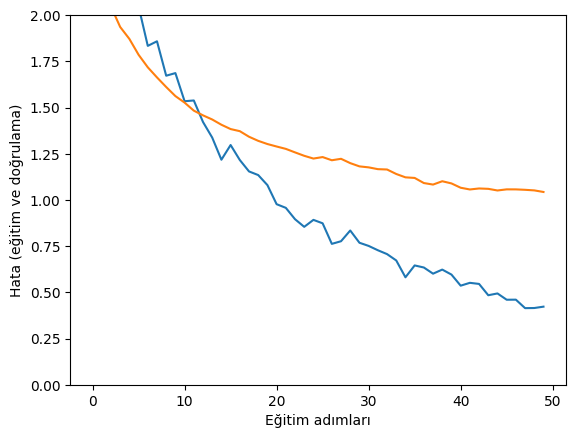

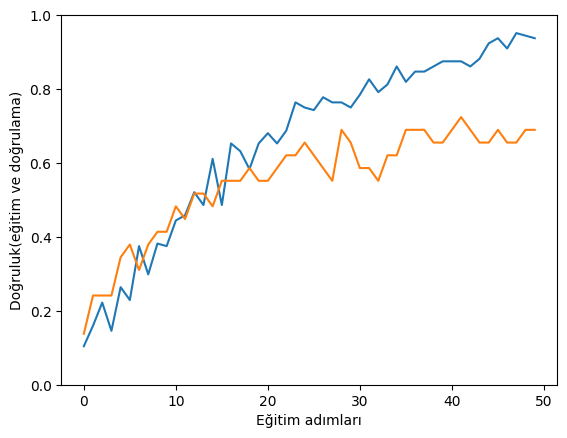

In [ ]:
# Visualize training process

plt.figure()
plt.ylabel("Hata (eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.savefig("loss.png")

plt.figure()
plt.ylabel("Doğruluk(eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.savefig("acc.png")

In [ ]:
#export model
from tensorflow import keras
pth3 = "/content/drive/My Drive/nlp/Modeller/snf"
model.save(pth3)
#tf.keras.experimental.export_saved_model(model, FLOWERS_SAVED_MODEL)

In [ ]:
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=50,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/50
5/5 [==============================] - 7s 1s/step - loss: 0.4171 - acc: 0.9167 - val_loss: 1.0413 - val_acc: 0.7241
Epoch 2/50
5/5 [==============================] - 8s 2s/step - loss: 0.4151 - acc: 0.9236 - val_loss: 1.0368 - val_acc: 0.7241
Epoch 3/50
5/5 [==============================] - 7s 1s/step - loss: 0.4274 - acc: 0.9375 - val_loss: 1.0163 - val_acc: 0.7241
Epoch 4/50
5/5 [==============================] - 7s 1s/step - loss: 0.4082 - acc: 0.9375 - val_loss: 1.0219 - val_acc: 0.7241
Epoch 5/50
5/5 [==============================] - 8s 2s/step - loss: 0.4016 - acc: 0.9167 - val_loss: 1.0426 - val_acc: 0.6552
Epoch 6/50
5/5 [==============================] - 6s 1s/step - loss: 0.3560 - acc: 0.9444 - val_loss: 1.0526 - val_acc: 0.6897
Epoch 7/50
5/5 [==============================] - 7s 1s/step - loss: 0.3478 - acc: 0.9514 - val_loss: 1.0388 - val_acc: 0.6897
Epoch 8/50
5/5 [==============================] - 9s 2s/step - loss: 0.3889 - acc: 0.9167 - val_loss: 1.0207 - 

1/1 [==============================] - 1s 1s/step - loss: 0.9463 - acc: 0.7586
Final loss: 0.95
Final accuracy: 75.86%


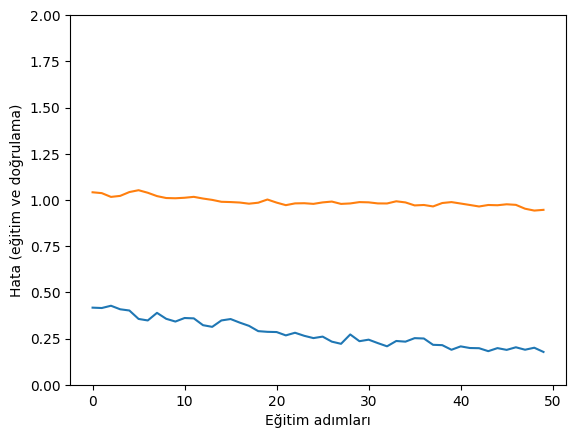

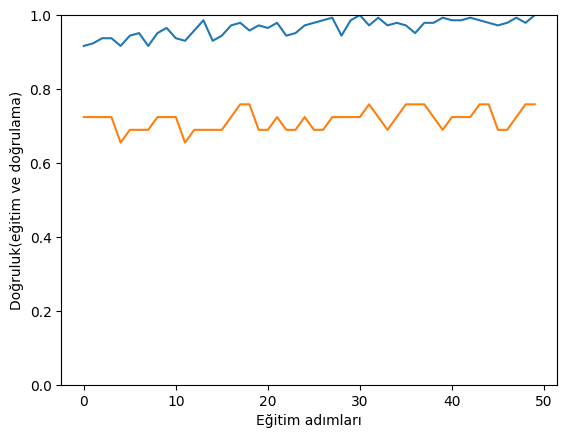

In [ ]:
final_loss, final_accuracy = model.evaluate(valid_generator, steps = val_steps_per_epoch)
print("Final loss: {:.2f}".format(final_loss))
print("Final accuracy: {:.2f}%".format(final_accuracy * 100))
plt.figure()
plt.ylabel("Hata (eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.savefig("loss2.png")

plt.figure()
plt.ylabel("Doğruluk(eğitim ve doğrulama)")
plt.xlabel("Eğitim adımları")
plt.ylim([0,1])
plt.plot(hist["acc"])
plt.plot(hist["val_acc"])
plt.savefig("acc2.png")

In [ ]:
from tensorflow import keras

In [ ]:
SHOE_SAVED_MODEL = "saved_models/shoe"
tf.keras.models.save_model(model, SHOE_SAVED_MODEL)
shoe_model = tf.keras.models.load_model(SHOE_SAVED_MODEL,
custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
model.save('C:/model/model.h5')

NameError: name 'model' is not defined